In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import rcParams
from sktime.forecasting.ets import AutoETS
from load import load_data
from load import train_test_split
from load import get_measures


import warnings # retirar avisos
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 15, 5

In [2]:
df = load_data()
df["load_mwmed"].interpolate(method = "linear", inplace = True)

In [3]:
n_test = 31
train, test = train_test_split(df, n_test)
train

,load_mwmed
date,
2000-01-01,4800.650000
2000-01-02,4899.800000
2000-01-03,6261.554167
2000-01-04,6733.741667
2000-01-05,6961.170833
...,...
2022-04-26,12640.413333
2022-04-27,13018.601750
2022-04-28,13048.245458


In [4]:
forecaster = AutoETS(auto=True, n_jobs=-1, seasonal = "add", sp=7 )
forecaster.fit(train.load_mwmed.values)

AutoETS(auto=True, n_jobs=-1, seasonal='add', sp=7)

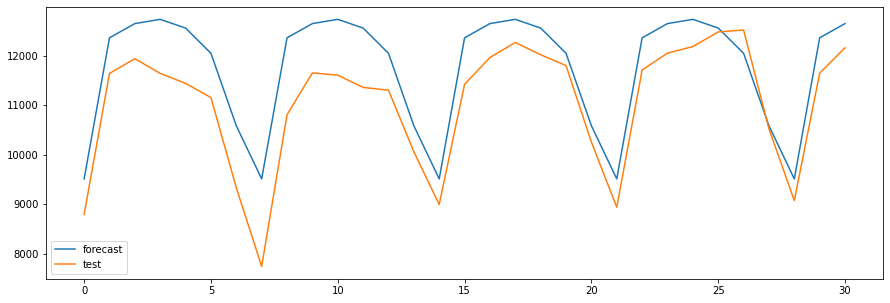

In [8]:
y_pred = forecaster.predict(fh=[x for x in range(1, 32)])
y_pred = [x for x in y_pred.flatten()]
plt.plot(y_pred, label = "forecast")
plt.plot(test.load_mwmed.reset_index(drop = True), label = "test")
plt.legend()
plt.show()

In [72]:
medidas_fc = get_measures(pd.Series(y_pred), test.load_mwmed) 
df_medidas_fc = pd.DataFrame([medidas_fc])
df_medidas_fc

,erro,mae,mse,rmse,mape,smape
0,67688958.59,1270.26,2183514.79,1477.67,0.12,11.77
